In [55]:
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [45]:
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.ImageFolder(root="../data/waste_classification_data/DATASET/TRAIN/", transform=transform)
test_data = datasets.ImageFolder(root="../data/waste_classification_data/DATASET/TEST/", transform=transform)


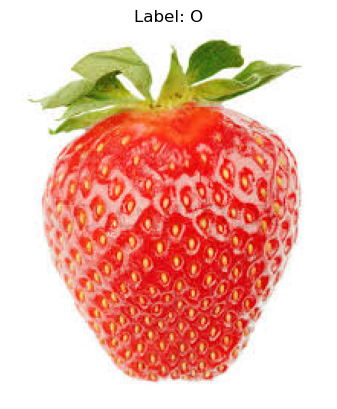

In [46]:
image = train_data[0][0]
label = train_data[0][1]
image_np = image.permute(1,2,0).numpy()  
plt.imshow(image_np)
plt.title(f"Label: {train_data.classes[label]}")  
plt.axis('off')  
plt.show()

In [47]:
num_classes = len(train_data.classes)
class_names = train_data.classes
print("Number of classes: ", num_classes)
print("Class names: ", class_names)

Number of classes:  2
Class names:  ['O', 'R']


#### Data Preprocessing

In [52]:
transform_new = transforms.Compose([
    transforms.Resize((224, 224)),    
    transforms.Normalize(            
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

train_data.transform = transform_new
test_data.transform = transform_new



In [51]:
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


In [ ]:
#Create Three Different CNN Architectures
#CNN Architecture 1 : AlexNet
#CNN Architecture 2 : VGG16
#CNN Architecture 3 : ResNet18
#CNN Architecture 4 : InceptionV3

#### AlexNet Architecture

In [56]:
alexnet_model = nn.Sequential(
nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
nn.ReLU(inplace=True),
nn.MaxPool2d(kernel_size=3, stride=2),

nn.Conv2d(64, 192, kernel_size=5, padding=2),
nn.ReLU(inplace=True),
nn.MaxPool2d(kernel_size=3, stride=2),

nn.Conv2d(192, 384, kernel_size=3, padding=1),
nn.ReLU(inplace=True),

nn.Conv2d(384, 256, kernel_size=3, padding=1),
nn.ReLU(inplace=True),

nn.Conv2d(256, 256, kernel_size=3, padding=1),
nn.ReLU(inplace=True),
nn.MaxPool2d(kernel_size=3, stride=2),
)





#### VGG16 Architecture

In [58]:
vgg16_model = nn.Sequential(
nn.Conv2d(3, 64, kernel_size=3, padding=1),
nn.ReLU(inplace=True),

nn.Conv2d(64, 64, kernel_size=3, padding=1),
nn.ReLU(inplace=True),

nn.MaxPool2d(kernel_size=2, stride=2),
nn.Conv2d(64, 128, kernel_size=3, padding=1),

nn.ReLU(inplace=True),
nn.Conv2d(128, 128, kernel_size=3, padding=1),

nn.ReLU(inplace=True),
nn.MaxPool2d(kernel_size=2, stride=2),

#More Layers - it should have 16 layers in total
)

#### ResNet-18 Architecture

In [57]:
resnet18_model = nn.Sequential(nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False), 
    nn.BatchNorm2d(64),
    nn.ReLU(inplace=True),
    nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    #It Could be more layers - it should have 18 layers in total
    ) 

#### InceptionV3 Architecture

In [2]:
#For Inception we will use the pretrained model

cpu


/Users/shreyjaradi/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/shreyjaradi/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/shreyjaradi/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:19<00:00, 12.8MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [2]:
#VGG16 Architecture using PyTorch
vgg16 = models.vgg16(pretrained=True)
print(vgg16)


/Users/shreyjaradi/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/shreyjaradi/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/shreyjaradi/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:21<00:00, 25.7MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
#ResNet18 Architecture using PyTorch
resnet18 = models.resnet18(pretrained=True)
print(resnet18)


/Users/shreyjaradi/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/shreyjaradi/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 26.6MB/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
#InceptionV3 Architecture using PyTorch
inception = models.inception_v3(pretrained=True)
print(inception)


/Users/shreyjaradi/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /Users/shreyjaradi/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:07<00:00, 13.8MB/s] 

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri